#Author: Munevver Sueda Kocaturk
#Oeson Project content:
#Predicting whether a group of students in a university can graduate or not using 5 different machine learning models.

In [1374]:
#import libraries and packages

import pandas as pd #for data manipulation and analysis
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for enhanced data visualization
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
#metrics calculation
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, accuracy_score,precision_score, recall_score


#Reading the csv file
std_df = pd.read_csv("/Users/munevverkocaturk/Downloads/Student_academic.csv")

In [1375]:
#Data overview

In [1376]:
#info about dataset
std_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [1377]:
#showing first 7 rows of a dataset
std_df.head(7)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate


In [1378]:
# EDA

In [1379]:
#Eliminate Null Values

In [1380]:
#dataframe contains 4424 rows and 35 Columns
print(std_df.shape)
#There are no null values
df_1 = std_df.dropna()
print(df_1.shape)

(4424, 35)
(4424, 35)


In [1381]:
number_of_nulls = std_df.isnull().sum()
print("# of null values")
print(number_of_nulls)

# of null values
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                  

In [1382]:
#There are no duplicated rows 
print(df_1.duplicated())
df_1.duplicated().unique()


0       False
1       False
2       False
3       False
4       False
        ...  
4419    False
4420    False
4421    False
4422    False
4423    False
Length: 4424, dtype: bool


array([False])

In [1383]:
std_df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [1384]:
#Dataset Columns

In [1385]:
# Dataset Columns
std_df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [1386]:
new_df = std_df.copy()

label_encoder = LabelEncoder()
new_df['Target'] = label_encoder.fit_transform(new_df['Target'])

corr_matrix = new_df.corr()


# Extract the correlation values with the target column
target_correlation = corr_matrix['Target'].drop('Target')

# Sort the correlations in descending order
sorted_correlations = target_correlation.abs().sort_values(ascending=False)

# Print the correlations
print(sorted_correlations)
     
     

Curricular units 2nd sem (approved)               0.624157
Curricular units 2nd sem (grade)                  0.566827
Curricular units 1st sem (approved)               0.529123
Curricular units 1st sem (grade)                  0.485207
Tuition fees up to date                           0.409827
Scholarship holder                                0.297595
Age at enrollment                                 0.243438
Debtor                                            0.240999
Gender                                            0.229270
Application mode                                  0.212025
Curricular units 2nd sem (enrolled)               0.175847
Curricular units 1st sem (enrolled)               0.155974
Displaced                                         0.113986
Curricular units 2nd sem (without evaluations)    0.094028
Curricular units 2nd sem (evaluations)            0.092721
Previous qualification                            0.091365
Marital status                                    0.0898

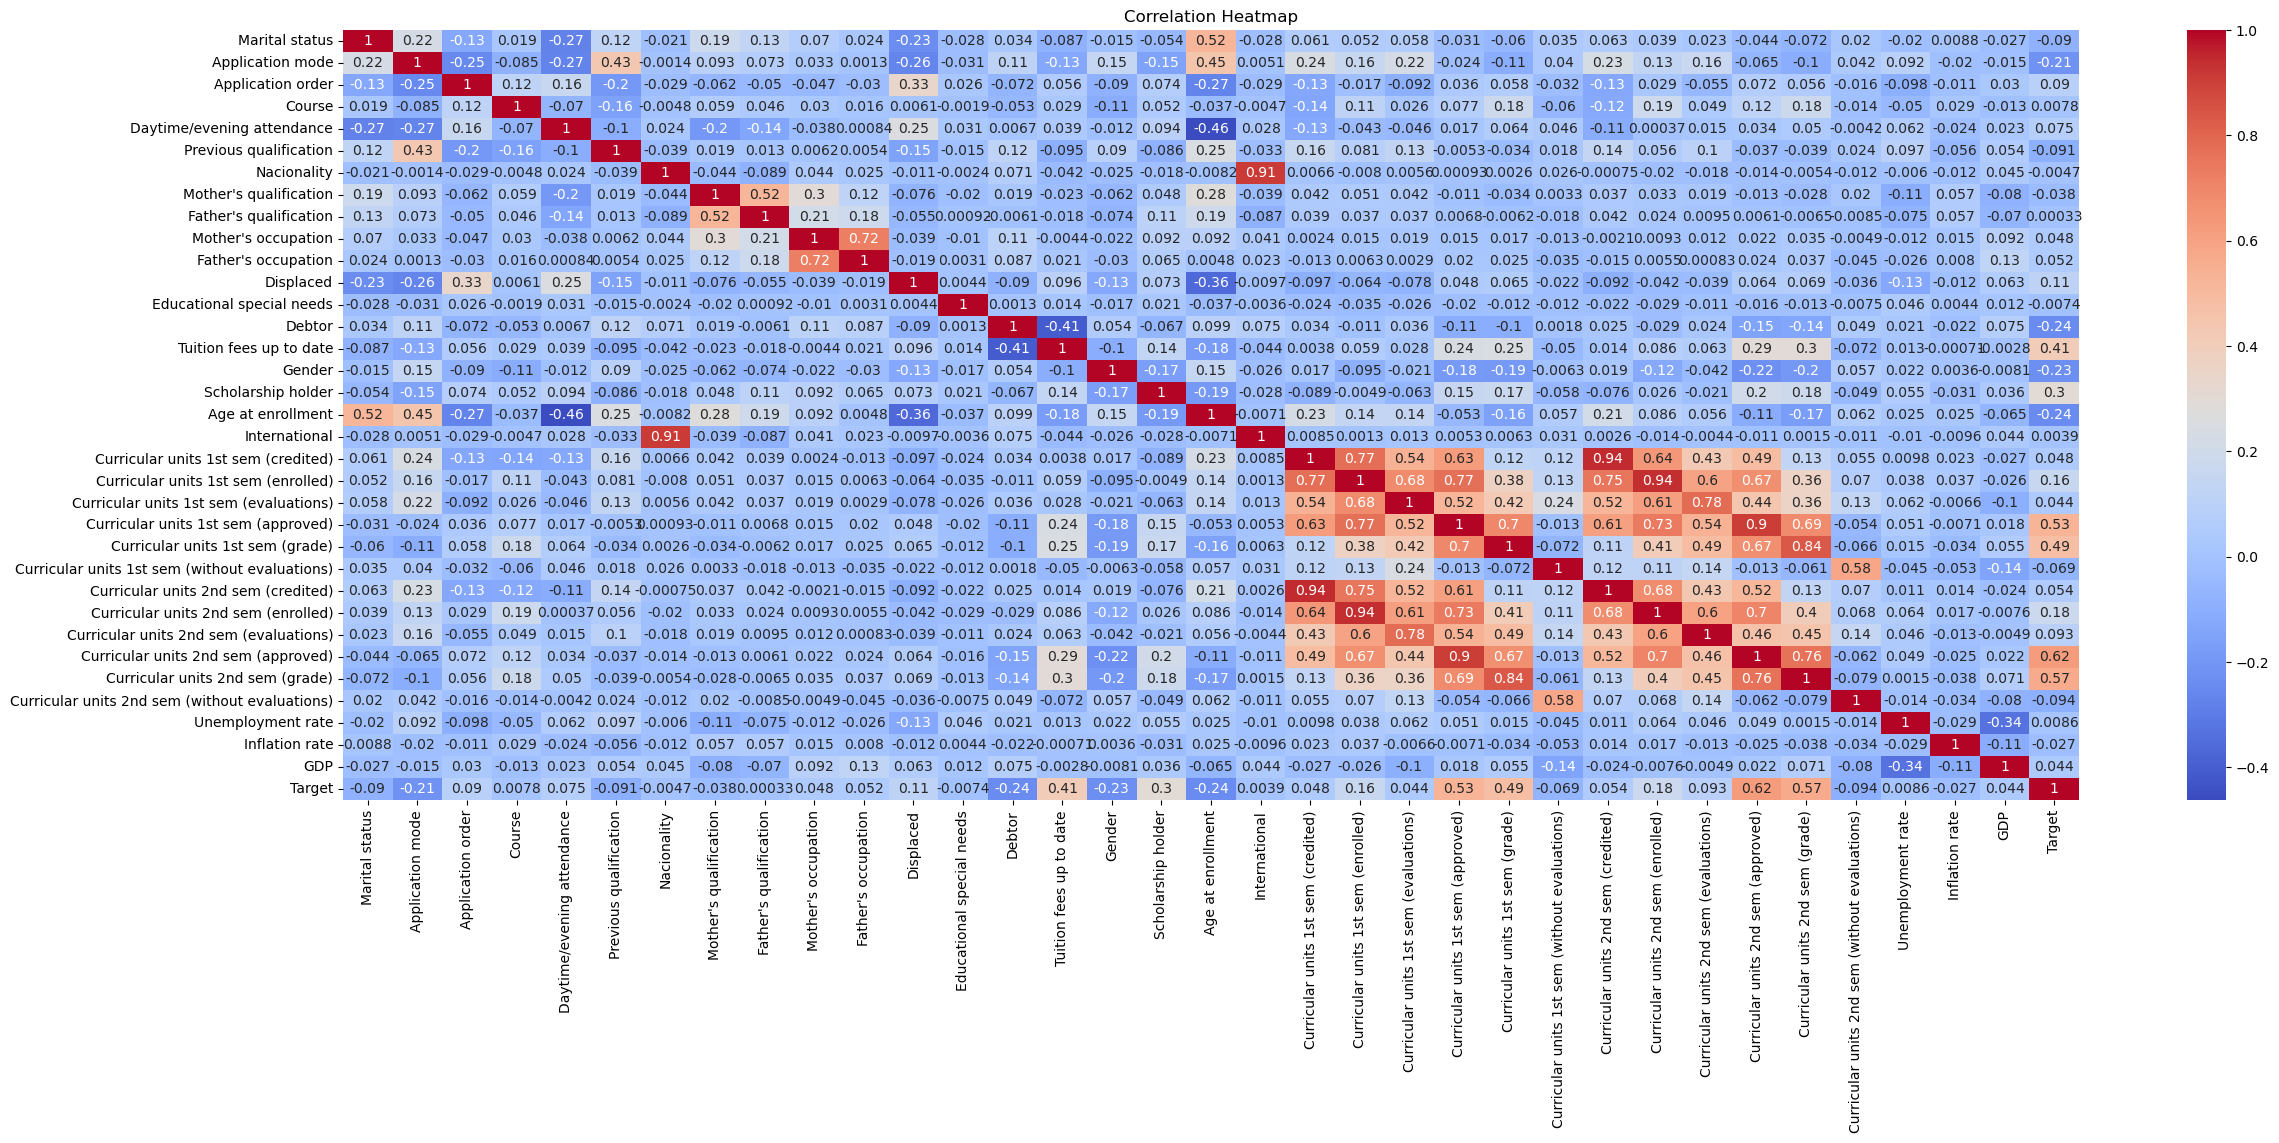

In [1387]:

plt.figure(figsize=(28, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
     

In [1388]:
#Select needed columns for EDA

In [1389]:
select_col=['Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)','Curricular units 1st sem (approved)',
              'Curricular units 2nd sem (approved)','Tuition fees up to date','Target']
#selecteddf=df[selected]
# Sort the correlations with the target variable in descending order
#target_correlations = selecteddf['Target'].sort_values(ascending=False)

# Print the correlation values

#print(target_correlations)

s_df = std_df[select_col]
no_enrolled = s_df[s_df['Target'] != 'Enrolled']
no_enrolled

,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Curricular units 2nd sem (approved),Tuition fees up to date,Target
0,0.000000,0.000000,0,0,1,Dropout
1,14.000000,13.666667,6,6,0,Graduate
2,0.000000,0.000000,0,0,0,Dropout
3,13.428571,12.400000,6,5,1,Graduate
4,12.333333,13.000000,5,6,1,Graduate
...,...,...,...,...,...,...
4419,13.600000,12.666667,5,5,1,Graduate
4420,12.000000,11.000000,6,2,0,Dropout
4421,14.912500,13.500000,7,1,1,Dropout
4422,13.800000,12.000000,5,5,1,Graduate


In [1390]:
no_enrolled.describe()

,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Curricular units 2nd sem (approved),Tuition fees up to date
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,10.534860,10.036155,4.791460,4.518457,0.866116
std,5.057694,5.481742,3.237845,3.162376,0.340575
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,10.517857,3.000000,2.000000,1.000000
50%,12.341429,12.333333,5.000000,5.000000,1.000000
75%,13.500000,13.500000,6.000000,6.000000,1.000000
max,18.875000,18.571429,26.000000,20.000000,1.000000


<Axes: >

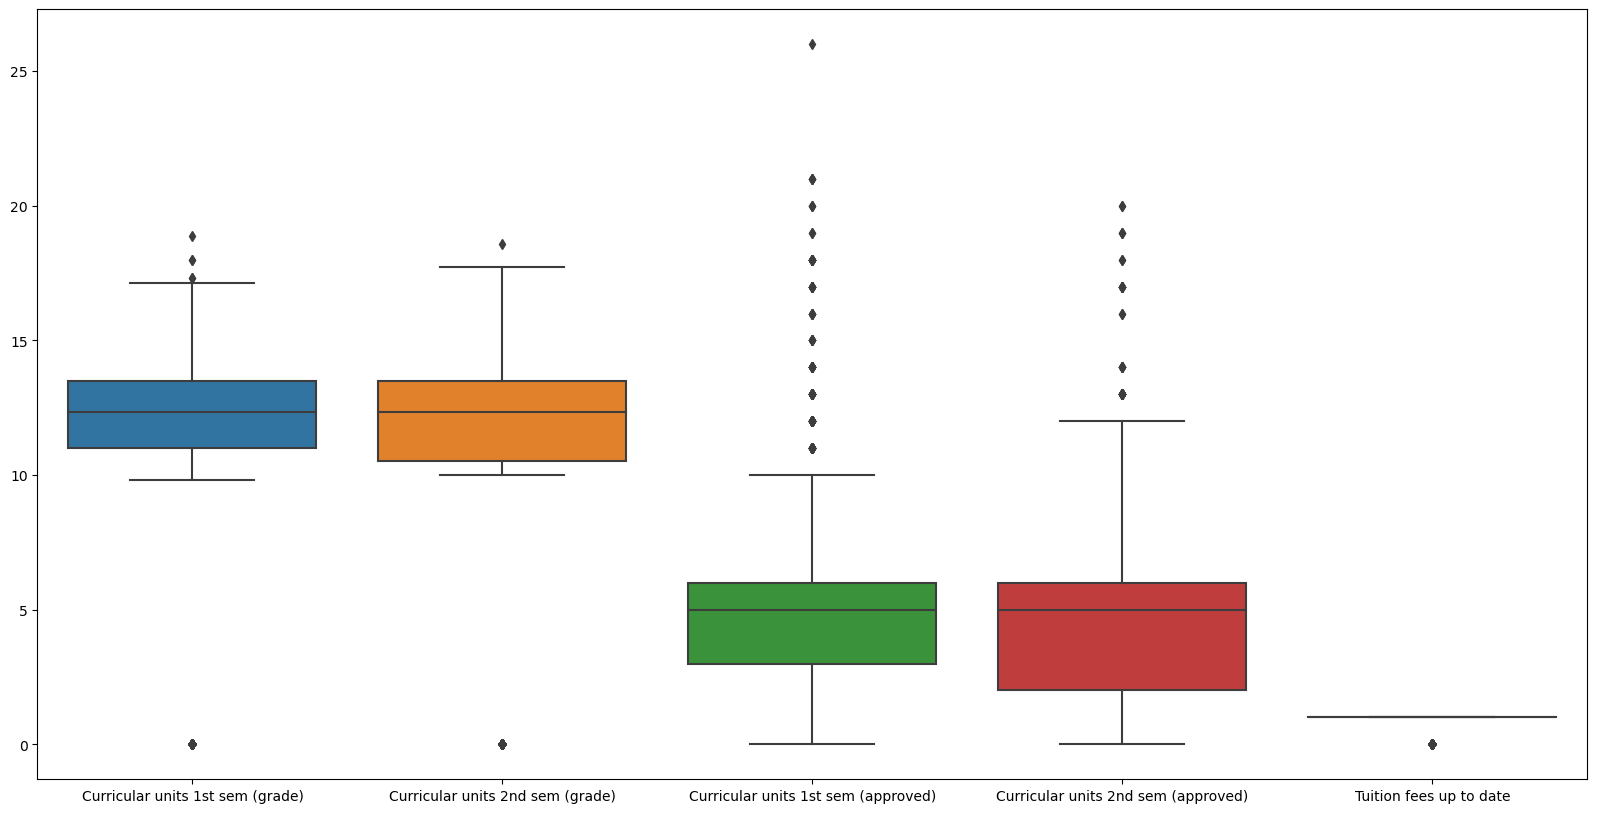

In [1391]:
plt.figure(figsize=(20,10))
sns.boxplot(data=no_enrolled)

In [1392]:
#shape of dataset before removing outliers
no_enrolled.shape

(3630, 6)

In [1393]:
#remove outliers

Q1 = no_enrolled.quantile(0.25)
Q3 = no_enrolled.quantile(0.75)
IQR = Q3 - Q1
#less than first quantile minus 1.5 times IQR or bigger than the third quintile plus 51.5 times IQR. 
#So we remove those data and we can see that there are actually quite a lot of outliers.
df_2 = no_enrolled[~((no_enrolled < (Q1 - 1.5 * IQR)) |(no_enrolled > (Q3 + 1.5 * IQR))).any(axis=1)]


/var/folders/gf/n576whgs0mzg_w2cmcwkgh9m0000gn/T/ipykernel_39551/2852750373.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = no_enrolled.quantile(0.25)
/var/folders/gf/n576whgs0mzg_w2cmcwkgh9m0000gn/T/ipykernel_39551/2852750373.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = no_enrolled.quantile(0.75)
/var/folders/gf/n576whgs0mzg_w2cmcwkgh9m0000gn/T/ipykernel_39551/2852750373.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_2 = no_enrolled[~((no_

In [1394]:
#shape of dataset after removing outliers 
df_2.shape

(2425, 6)

<Axes: >

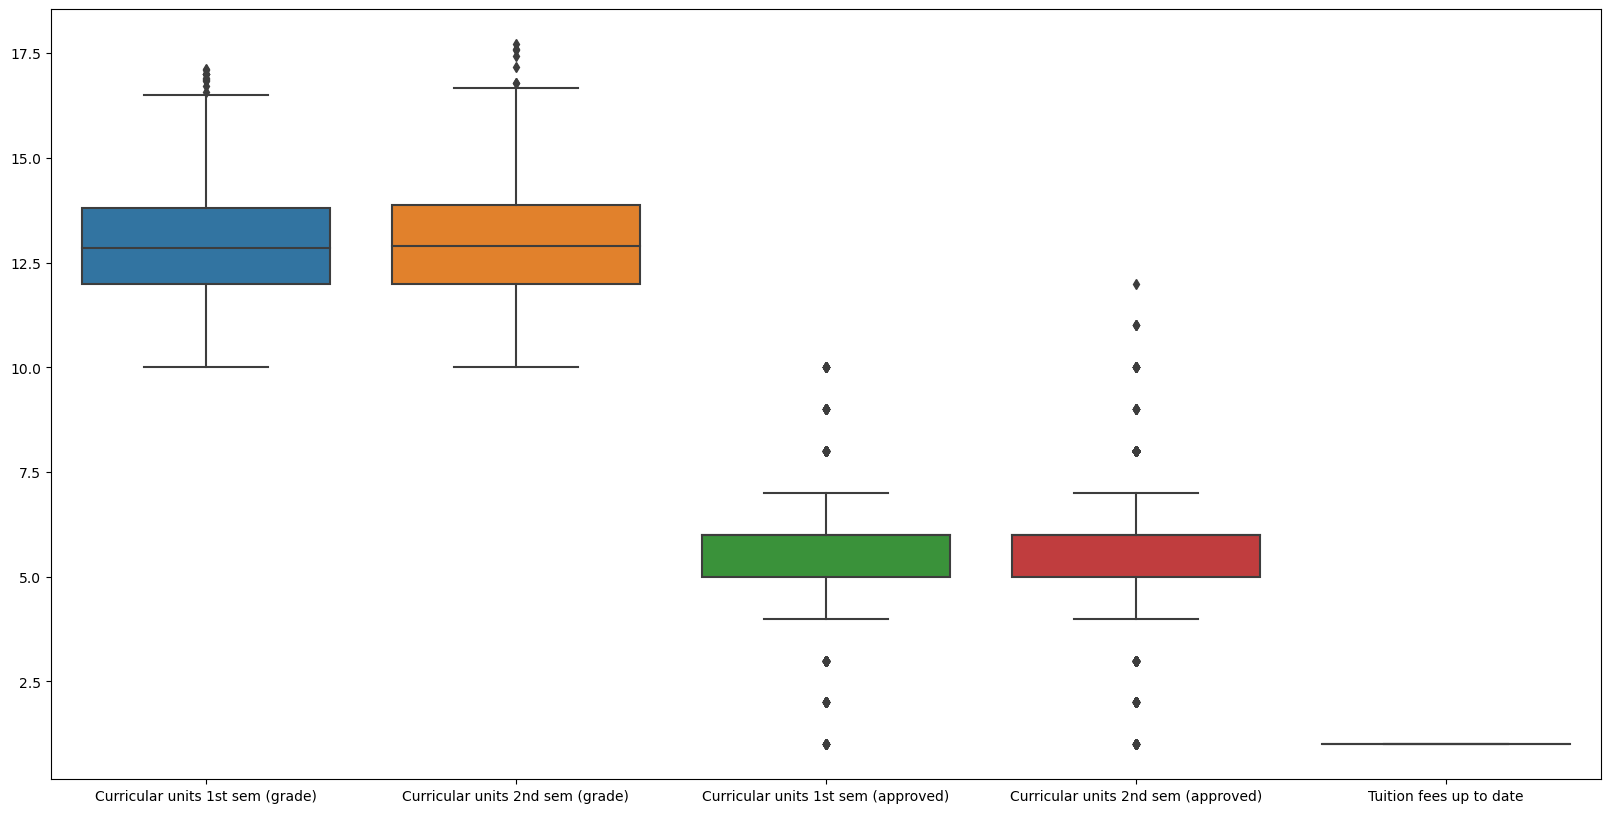

In [1395]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_2)

In [1396]:
#ENCODING TARGET VARIABLE
#we encode the target variable with only 0 and 1

In [1397]:
label_encoder = LabelEncoder()
df_2['Target'] = label_encoder.fit_transform(df_2['Target'])
df_2

/var/folders/gf/n576whgs0mzg_w2cmcwkgh9m0000gn/T/ipykernel_39551/3556234523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Target'] = label_encoder.fit_transform(df_2['Target'])


,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Curricular units 2nd sem (approved),Tuition fees up to date,Target
3,13.428571,12.400000,6,5,1,1
4,12.333333,13.000000,5,6,1,1
5,11.857143,11.500000,5,5,1,1
6,13.300000,14.345000,7,8,1,1
8,13.875000,14.142857,6,6,1,1
...,...,...,...,...,...,...
4418,12.500000,13.142857,6,7,1,1
4419,13.600000,12.666667,5,5,1,1
4421,14.912500,13.500000,7,1,1,0
4422,13.800000,12.000000,5,5,1,1


In [1398]:
#final version of features of dataset
data_final = df_2.drop('Target', axis=1)
labels = df_2['Target']
print (data_final.shape)
print(labels.shape)

(2425, 5)
(2425,)


In [1399]:
#standardising data

In [1400]:
# splitting data for training and testing 
X_train, X_test, y_train, y_test = train_test_split(data_final, labels, test_size=0.2, random_state=0)


In [1401]:
#5 DIFFERENT MACHINE LEARNING MODELS

In [1402]:
#Naive Bayes

In [1403]:
gaussian = GaussianNB()

gaussian.fit(X_train, y_train)

y_pred_2 = gaussian.predict(X_test)

y_pred_binary = (y_pred_2 > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)

acc_gaussian=round(accuracy * 100, 2)

print(acc_gaussian)

88.25


In [1404]:
#Decision Tree

In [1405]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(X_train,y_train)
y_pred_3=decisiontree.predict(X_test)

y_pred_binary = (y_pred_3 > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)

acc_dt=round(accuracy * 100, 2)
print(acc_dt)

85.36


In [1406]:
#Random Forest

In [1407]:
#hyperparameters n_estimator with 90,100 ,random_state starting with 0 to 100
r_forest = RandomForestClassifier()
r_forest.fit(X_train, y_train)
Y_prediction = r_forest.predict(X_test)
acc_random_forest = round(r_forest.score(X_test, y_test) * 100, 2)
print(acc_random_forest)


87.84


In [1408]:
#Support Vector Classifier

In [1409]:
Svc = LinearSVC()
Svc.fit(X_train,y_train)
Y_pred=Svc.predict(X_test)
acc_svc=round(Svc.score(X_test, y_test) * 100, 2)
print(acc_svc)


89.69


/Users/munevverkocaturk/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [1410]:
#K-Nearest Neighbours

In [1411]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid to search over
param_grid = {
    'n_neighbors': [1,2,3,4,5,7,8,9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create an instance of the KNeighborsClassifier
knn = KNeighborsClassifier()

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameter combination and the corresponding accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameter Combination:", best_params)
print("Best Accuracy Score:", best_score)


Best Parameter Combination: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}
Best Accuracy Score: 0.8788659793814432


In [1412]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

y_pred_6 = knn.predict(X_test)
y_pred_binary = (y_pred_6 > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
acc_knn = round(accuracy*100,2)

print(acc_knn)

90.1


In [1413]:
#Logistic Regression

In [1414]:
logitreg = LogisticRegression()
logitreg.fit(X_train, y_train)

# Make predictions
logit_pred = logitreg.predict(X_test)

y_pred_binary = (logit_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)

acc_log=round(accuracy * 100, 2)
print(acc_log)


89.28


In [1415]:
results = pd.DataFrame({
    'Model': [ 'gaussian', 
              'Decision Tree',
              'Random Forest',
              'LinearSVC','K-Nearest Neighbours',
              'Logistic Regression',
              ],
    'Score': [ acc_log, acc_random_forest, acc_gaussian, acc_dt ,acc_knn,acc_svc]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,Score
Model,
K-Nearest Neighbours,90.10
Logistic Regression,89.69
gaussian,89.28
Random Forest,88.25
Decision Tree,87.84
LinearSVC,85.36


In [1416]:
#Confusion Matrix

/var/folders/gf/n576whgs0mzg_w2cmcwkgh9m0000gn/T/ipykernel_39551/929413886.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels([' ', 'Predicted: 0 (DropOut)','  ', 'Predicted: 1 (Graduated)', ''], fontsize=8)
/var/folders/gf/n576whgs0mzg_w2cmcwkgh9m0000gn/T/ipykernel_39551/929413886.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels([' ',' ', 'Actual: 0 (DropOut)',' ', ' ',' ','Actual: 1 (Graduated)', ''], fontsize=8)


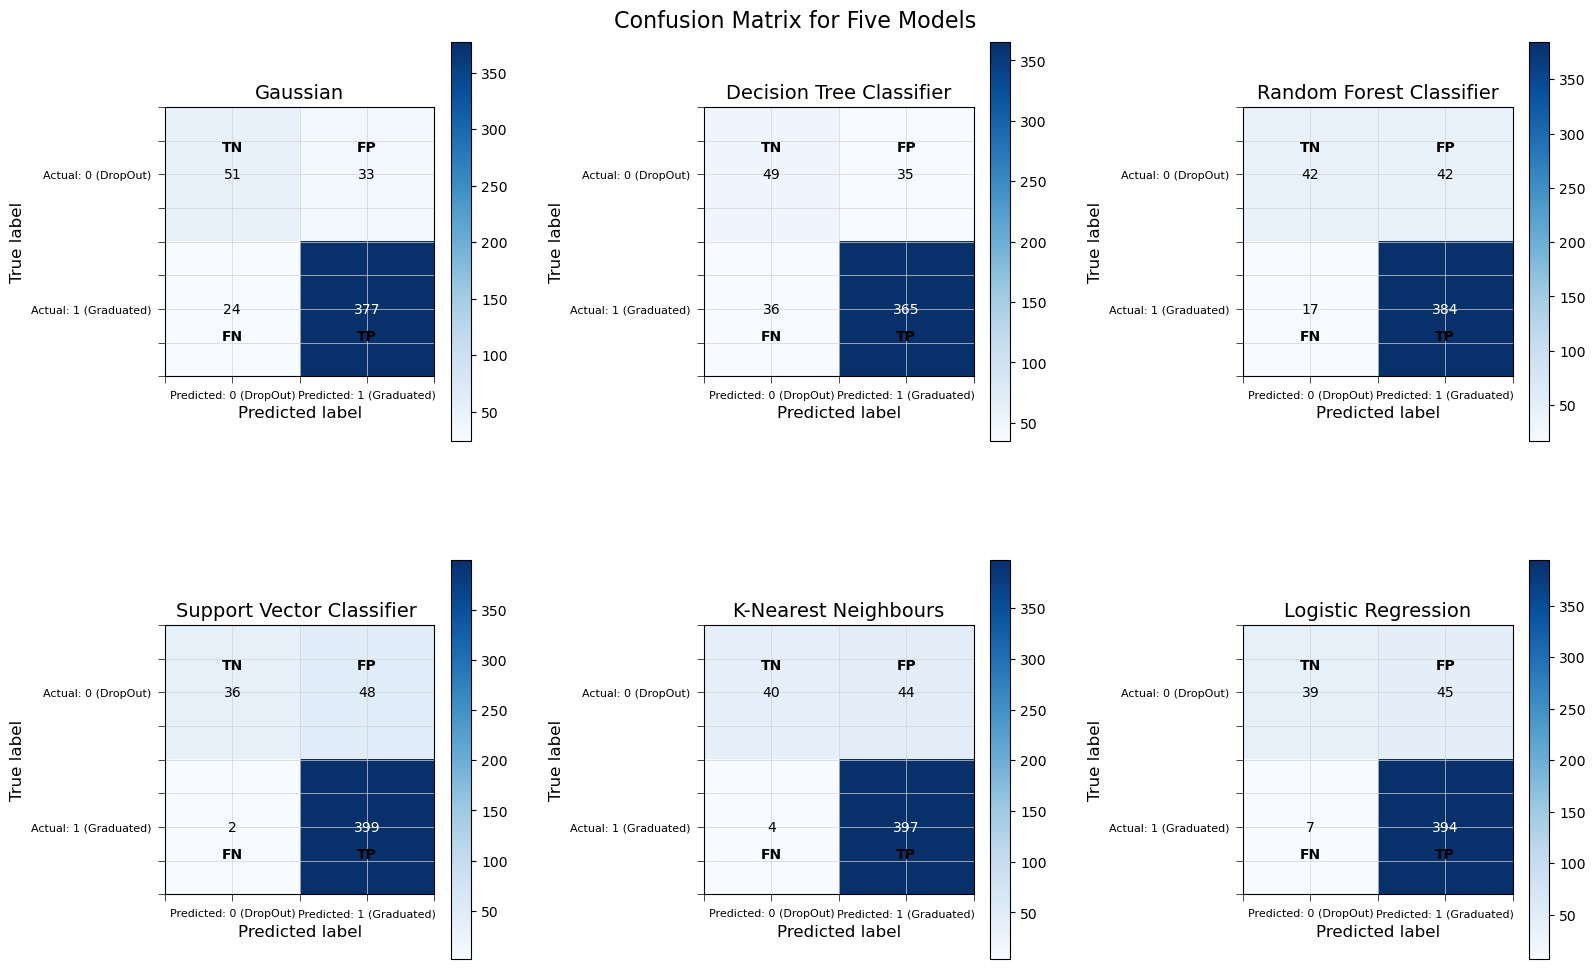

In [1417]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

models = {
    'Gaussian': gaussian,
    'Decision Tree Classifier': decisiontree,
    'Random Forest Classifier': r_forest,
    'Support Vector Classifier ': Svc,
    'K-Nearest Neighbours': knn,
    'Logistic Regression': logitreg
}

# Create an empty dictionary to store confusion matrices
confusion_matrices = {}

# Compute confusion matrix for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred_binary)
    confusion_matrices[model_name] = cm

# Plot for each model
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
fig.suptitle('Confusion Matrix for Five Models', fontsize=16)

for ax, (model_name, cm) in zip(axes.flat, confusion_matrices.items()):
    # Plot the confusion matrix
    im = ax.imshow(cm, cmap='Blues')

    # Add colorbar
    cbar = fig.colorbar(im, ax=ax)

    # Set labels, title, and ticks
    ax.set_xlabel('Predicted label', fontsize=12)
    ax.set_ylabel('True label', fontsize=12)
    ax.set_title(model_name, fontsize=14)
    ax.xaxis.set_ticklabels([' ', 'Predicted: 0 (DropOut)','  ', 'Predicted: 1 (Graduated)', ''], fontsize=8)
    ax.yaxis.set_ticklabels([' ',' ', 'Actual: 0 (DropOut)',' ', ' ',' ','Actual: 1 (Graduated)', ''], fontsize=8)
    ax.xaxis.set_tick_params(width=0.5, length=5, pad=5)
    ax.yaxis.set_tick_params(width=0.5, length=5, pad=5)

    # Add TP, TN, FP, FN text annotations
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha='center', va='center',
                    color='white' if cm[i, j] > cm.max() / 2 else 'black')

    # Display grid
    ax.grid(visible=True, color='lightgray', linewidth=0.5)

    # Add TP, TN, FP, FN labels inside the plot box
    ax.text(0.25, 0.85, 'TN', ha='center', va='center', color='black', fontsize=10, fontweight='bold',
            transform=ax.transAxes)
    ax.text(0.75, 0.85, 'FP', ha='center', va='center', color='black', fontsize=10, fontweight='bold',
            transform=ax.transAxes)
    ax.text(0.25, 0.15, 'FN', ha='center', va='center', color='black', fontsize=10, fontweight='bold',
            transform=ax.transAxes)
    ax.text(0.75, 0.15, 'TP', ha='center', va='center', color='black', fontsize=10, fontweight='bold',
            transform=ax.transAxes)

# Adjust the layout and spacing
fig.tight_layout(rect=[0, 0, 1, 1])
plt.subplots_adjust(hspace=0.3, wspace=0.6)

# Show the plot
plt.show()


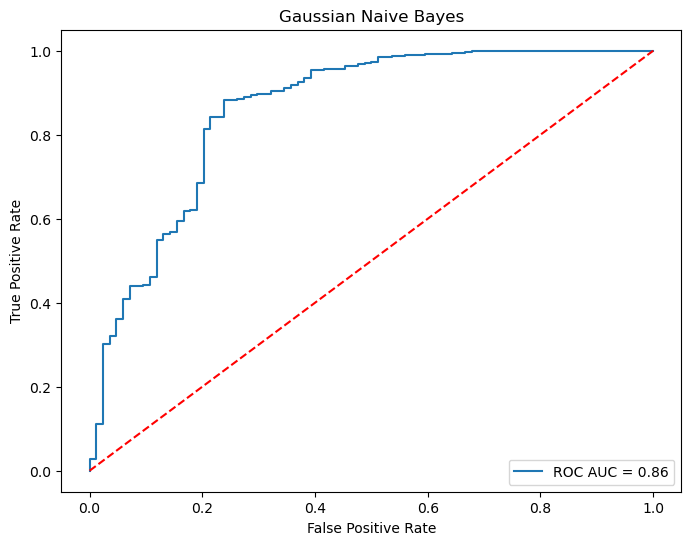

In [1418]:
# Compute predicted probabilities for the Logistic Regression model
y_scores = gaussian.predict_proba(X_test)[:, 1]

# Compute false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC AUC = {:.2f}'.format(roc_auc))
plt.title('Gaussian Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')

# Show the plot



plt.show()


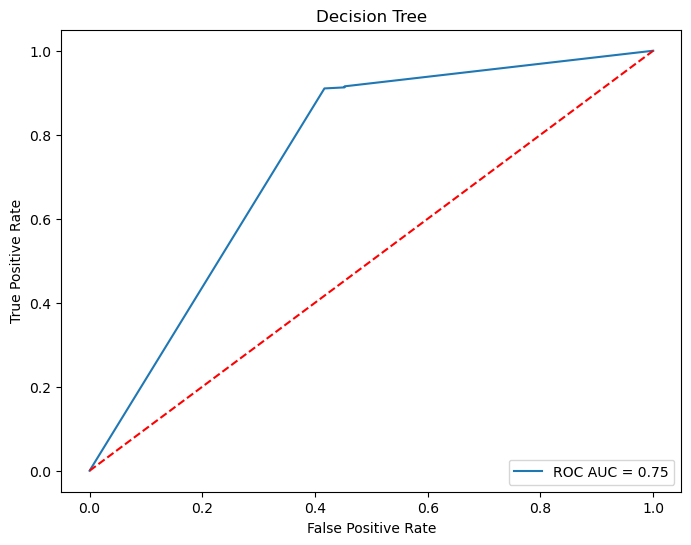

In [1419]:
# Compute predicted probabilities for the Logistic Regression model
y_scores = decisiontree.predict_proba(X_test)[:, 1]

# Compute false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC AUC = {:.2f}'.format(roc_auc))
plt.title('Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')

# Show the plot



plt.show()


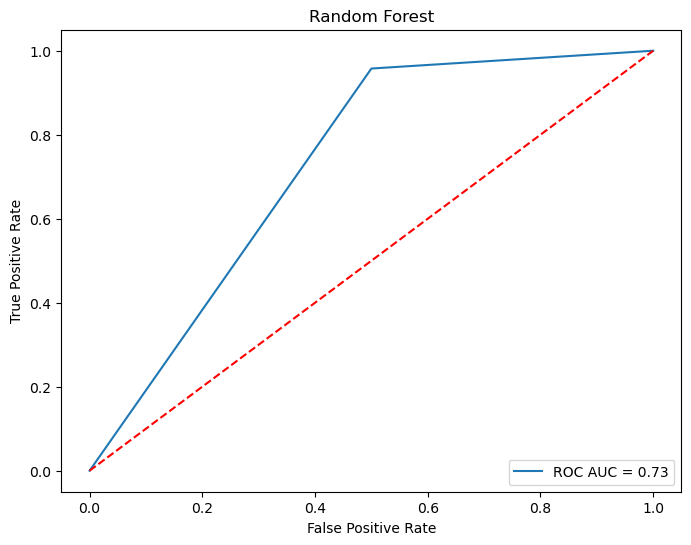

In [1420]:
# Compute predicted probabilities for the Random Forest Classifier model

y_pred = r_forest.predict(X_test)

# Compute false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC AUC = {:.2f}'.format(roc_auc))
plt.title('Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')

# Show the plot

plt.show()


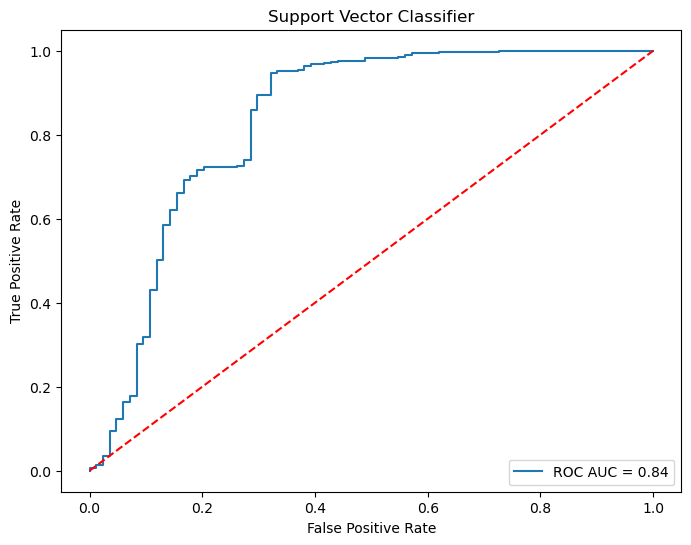

In [1421]:
# Compute predicted probabilities for theSupport Vector Classifier model

y_scores = Svc.decision_function(X_test)

# Compute false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_scores)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC AUC = {:.2f}'.format(roc_auc))
plt.title('Support Vector Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')

# Show the plot



plt.show()


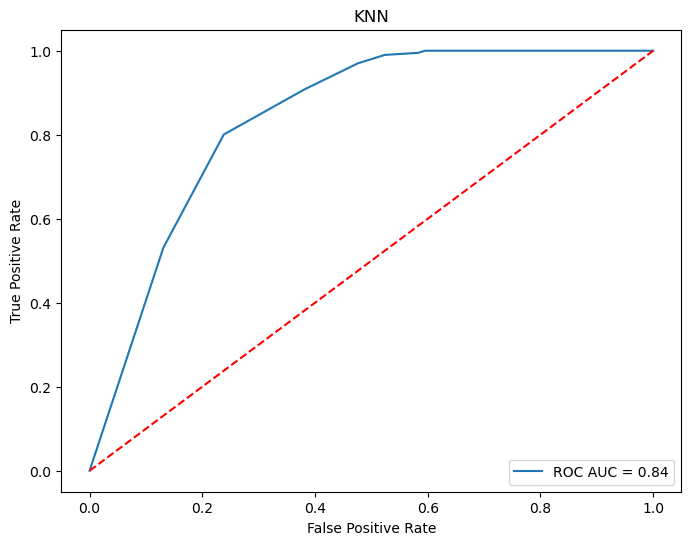

In [1422]:
# Compute predicted probabilities for the k-Nearest Neighbors Classifier model
y_scores = knn.predict_proba(X_test)[:, 1]

# Compute false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC AUC = {:.2f}'.format(roc_auc))
plt.title('KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')

# Show the plot


plt.show()


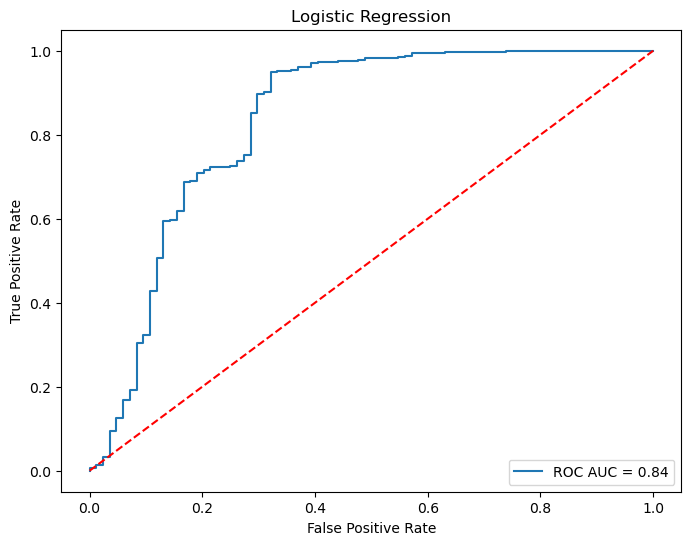

In [1423]:
# Compute predicted probabilities for the Logistic Regression model
y_scores = logitreg.predict_proba(X_test)[:, 1]

# Compute false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC AUC = {:.2f}'.format(roc_auc))
plt.title('Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')

# Show the plot
plt.show()


